In [14]:
# Bibliotecas usadas
import csv
import math
import random
import copy

from tabulate import tabulate
import folium
from folium.plugins import MarkerCluster
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

from selenium import webdriver
import time
from time import sleep
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

### Importando dados

In [2]:
# Caminho para o arquivo enviado
file_path = "dados_csv/Clientes - São Carlos.csv"

# Inicializando o dicionário
dados_clientes = {}

with open(file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if len(row) >= 2:
            nome = row[0].strip()
            latitude = row[1].strip()
            longitude = row[2].strip()
            
            dados_clientes[nome] = {
                "latitude": latitude,
                "longitude": longitude,
            }

dados_clientes

{'Cliente 1': {'latitude': '-21.997355713022362',
  'longitude': '-47.91615792412108'},
 'Cliente 2': {'latitude': '-22.01661750188477',
  'longitude': '-47.91465740075626'},
 'Cliente 3': {'latitude': '-22.02151494773092',
  'longitude': '-47.857824955671475'},
 'Cliente 4': {'latitude': '-22.055594132688373',
  'longitude': '-47.897370368937196'},
 'Cliente 5': {'latitude': '-22.036600695832508',
  'longitude': '-47.89249820476121'},
 'Cliente 6': {'latitude': '-22.01626531587018',
  'longitude': '-47.88944873613508'},
 'Cliente 7': {'latitude': '-21.960636833309252',
  'longitude': '-47.88623904154001'},
 'Cliente 8': {'latitude': '-22.07193406081502',
  'longitude': '-47.88282945214689'},
 'Cliente 9': {'latitude': '-21.986150701052672',
  'longitude': '-47.87753472366611'},
 'Cliente 10': {'latitude': '-22.0010449398892',
  'longitude': '-47.900084501812586'},
 'Cliente 11': {'latitude': '-21.98200151392029',
  'longitude': '-47.91496540984307'},
 'Cliente 12': {'latitude': '-21.9

In [3]:
clientes = []
clientes = list(dados_clientes.keys())

In [4]:
# Caminho para o arquivo enviado
file_path = "dados_csv/Posto de Recarga - São Carlos.csv"

# Inicializando o dicionário
dados_postos_existentes = {}

# Lendo o arquivo CSV
with open(file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if len(row) >= 2:
            coordenadas_str = row[0].strip()
            nome = row[1].strip()
            
            # Verifica se a string começa com "POINT (" e termina com ")"
            if coordenadas_str.startswith("POINT (") and coordenadas_str.endswith(")"):
                coordenadas_limpa = coordenadas_str.replace("POINT (", "").replace(")", "").strip()
                partes = coordenadas_limpa.split()

                if len(partes) == 2:
                    longitude, latitude = partes

                    '''dados_postos[nome] = {
                        "coordenadas": coordenadas_str,
                        "posto": nome,
                        "latitude": latitude,
                        "longitude": longitude
                    }'''
                    dados_postos_existentes[nome] = {
                        "latitude": latitude,
                        "longitude": longitude
                    }

#dados_postos_existentes

In [5]:
# Caminho para o arquivo enviado
file_path = "dados_csv/Postos Candidatos - São Carlos.csv"

# Inicializando o dicionário
dados_postos_candidatos = {}

with open(file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if len(row) >= 3:
            nome = row[0].strip()
            latitude = row[1].strip()
            longitude = row[2].strip()
            local = row[3].strip()
            
            dados_postos_candidatos[nome] = {
                "latitude": latitude,
                "longitude": longitude,
                "local": local
            }

dados_postos_candidatos

{'Posto 1': {'latitude': '-22.039477917835573',
  'longitude': '-47.87711673317104',
  'local': 'Posto 1'},
 'Posto 2': {'latitude': '-22.072197572943235',
  'longitude': '-47.88041523921826',
  'local': 'Posto 2'},
 'Posto 3': {'latitude': '-22.01899504602835',
  'longitude': '-47.890768384048954',
  'local': 'Posto 3'},
 'Posto 4': {'latitude': '-21.97731977530719',
  'longitude': '-47.930452449724875',
  'local': 'Posto 4'},
 'Posto 5': {'latitude': '-22.04822459179828',
  'longitude': '-47.860355498107566',
  'local': 'Posto 5'},
 'Posto 6': {'latitude': '-22.01944232069535',
  'longitude': '-47.913934569082265',
  'local': 'Posto 6'},
 'Posto 7': {'latitude': '-22.005831815538844',
  'longitude': '-47.900012963953344',
  'local': 'Posto 7'},
 'Posto 8': {'latitude': '-22.03476975513763',
  'longitude': '-47.869507482818484',
  'local': 'Posto 8'},
 'Posto 9': {'latitude': '-22.03715049059105',
  'longitude': '-47.841178084774796',
  'local': 'Posto 9'},
 'Posto 10': {'latitude': '

In [6]:
postos_existentes = []
postos_existentes = list(dados_postos_existentes.keys())

postos_candidatos = []
postos_candidatos = list(dados_postos_candidatos.keys())

n = len(postos_existentes) # armazena o tamanho original da lista dados_postos (postos já existentes)
print(n)

dados_postos = {}
dados_postos.update(dados_postos_existentes)
dados_postos.update(dados_postos_candidatos)

postos = []
postos = list(dados_postos.keys())

14


In [7]:
dados_postos

{'Estação de recarga da Graal - São Carlos': {'latitude': '-21.9847763',
  'longitude': '-47.9089512'},
 'Chevrolet Javep São Carlos': {'latitude': '-22.0183665',
  'longitude': '-47.9115539'},
 'Estacao de carregamento de veiculos eletricos': {'latitude': '-21.998771',
  'longitude': '-47.92209339999999'},
 'Estação de carregamento para veículos elétricos': {'latitude': '-22.0048959',
  'longitude': '-47.8890099'},
 'Estação de recarga de veículos elétricos': {'latitude': '-22.024159',
  'longitude': '-47.89454980000001'},
 'Estação de carregamento de veículos elétricos': {'latitude': '-22.101616',
  'longitude': '-47.8243677'},
 'Estação de recarga da Castelo Posts': {'latitude': '-22.0931814',
  'longitude': '-47.8319362'},
 'Estação de recarga da Nacional Inn - São Carlos': {'latitude': '-22.035575',
  'longitude': '-47.8700791'},
 'Eletroposto Auto Posto Agito Ltda': {'latitude': '-22.026522',
  'longitude': '-47.87421699999999'},
 'Eletroposto Cardinali': {'latitude': '-22.002758

# DISTÂNCIAS REAIS

##### Trajeto mais rápido levando em consideração as condições de trânsito

#### Automatização do cálculo da melhor distância de um cliente até um posto

In [ ]:
def info():
    sleep(3)
    distance = driver.find_element('xpath', '/html/body/div[1]/div[2]/div[9]/div[8]/div/div/div[1]/div[2]/div/div[1]/div/div/div[5]/div/div[1]/div/div[1]/div[2]/div').text # armazena a distancia entre um cliente e um posto
    if 'km' in distance: # Se estiver em km, converter para metros
        distancia = float(distance.replace(' km', '').replace(',', '.'))
        distancia = distancia * 1000
    elif 'm' in distance: # Se já estiver em metros, apenas extrair o número
        distancia = float(distance.replace(' m', '').replace(',', '.'))
    else:
        raise ValueError(f"Formato de distância desconhecido: {distance}")

    return distancia

def search(coord_posto, coord_cliente):
    sleep(2)
    driver.find_element('xpath', '//*[@id="sb_ifc51"]/input').click()
    driver.find_element('xpath', '//*[@id="sb_ifc51"]/input').send_keys(coord_posto) # escreve as coordenadas do posto
    sleep(2)
    driver.find_element('xpath', '//*[@id="sb_ifc50"]/input').click()
    driver.find_element('xpath', '//*[@id="sb_ifc50"]/input').send_keys(coord_cliente) # escreve as coordenadas do cliente
    sleep(1)
    driver.find_element('xpath', '//*[@id="directions-searchbox-0"]/button[1]/span').click() # clica em pesquisar
    sleep(1)
    driver.find_element('xpath', '/html/body/div[1]/div[2]/div[9]/div[3]/div[1]/div[2]/div/div[1]/div/div/div/div[2]/button/div[1]').click() # rotas por carro

In [ ]:
'''
    d_{i,j} = distância do cliente i ao posto j
'''

d = [[0 for j in range(len(postos))] for i in range(len(clientes))] # d_ij

inicio = time.time()

driver = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=driver)
driver.get('https://www.google.com/maps/@-21.9552607,-48.0116736,15z/data=!5m1!1e1?entry=ttu&g_ep=EgoyMDI1MDQxNi4xIKXMDSoJLDEwMjExNDU1SAFQAw%3D%3D')
sleep(2)
driver.find_element('xpath', '/html/body/div[1]/div[2]/div[9]/div[3]/div[1]/div[1]/div/div[1]/div[2]/button/span').click() # clica em rota

for i, c in enumerate(clientes):
    for j, p in enumerate(postos):
        coord_cliente = {}
        coord_posto = {}
        
        coord_posto = f"{dados_postos[p]["latitude"]}, {dados_postos[p]["longitude"]}"
        coord_cliente = f"{dados_clientes[c]["latitude"]}, {dados_clientes[c]["longitude"]}"

        search(coord_posto, coord_cliente)
        d[i][j] = info()
            
driver.quit() # encerra o navegador        
fim = time.time()
print(fim - inicio)

### Gráfico Função objetivo vs. Número de medianas"

Set parameter Username
Set parameter LicenseID to value 2739195
Academic license - for non-commercial use only - expires 2026-11-15


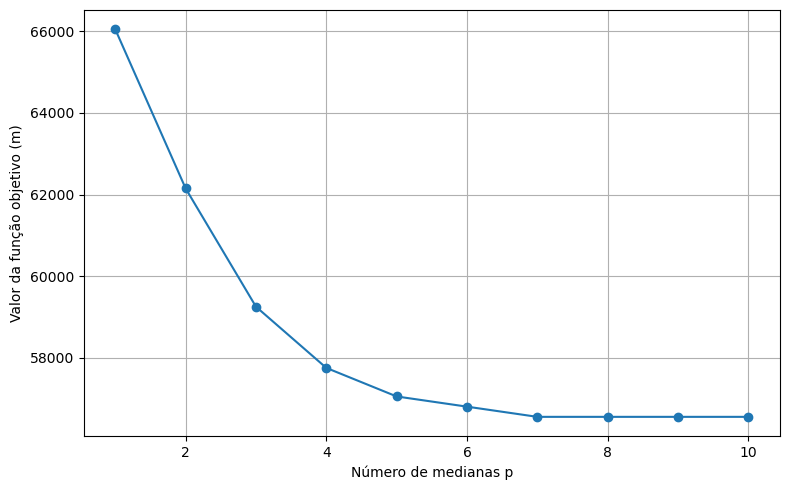

In [9]:
M = len(clientes)
N = len(postos)

valores_objetivo = []
tempos_execucao = []
valores_p = list(range(1, 11))

for p in valores_p:
    m = gp.Model(f"Problema_p_{p}")
    m.setParam("OutputFlag", 0)  # desliga o output do solver

    # Variáveis
    x = m.addVars(M, N+n, vtype=GRB.BINARY, name="x")
    y = m.addVars(N+n, vtype=GRB.BINARY, name="y")

    # Postos existentes fixos como abertos
    for j in range(n):
        m.addConstr(y[j] == 1, name=f"PostoExistente_{j}")

    # Função objetivo
    m.setObjective(
        gp.quicksum(d[i][j] * x[i, j] for i in range(M) for j in range(N)),
        GRB.MINIMIZE
    )

    # Cada cliente deve ser atendido por um único posto
    m.addConstrs(
        (gp.quicksum(x[i, j] for j in range(N)) == 1 for i in range(M)),
        name="DemandaClientes"
    )

    # Número de instalações: já existem n, adicionar mais p
    P = p + n
    m.addConstr(gp.quicksum(y[j] for j in range(N)) == P, name="NumeroInstalacoes")

    # Cliente só pode ser atendido por postos abertos
    m.addConstrs(
        (x[i, j] <= y[j] for i in range(M) for j in range(N)),
        name="AtendeSeAberto"
    )

    # Otimiza
    m.optimize()

    if m.status == GRB.OPTIMAL:
        valores_objetivo.append(m.objVal)
        tempos_execucao.append(round(m.Runtime, 2))
    else:
        valores_objetivo.append(None)
        tempos_execucao.append(None)

# Plotando o gráfico
plt.figure(figsize=(8, 5))
plt.plot(valores_p, valores_objetivo, marker='o', linestyle='-')
plt.xlabel("Número de medianas p")
plt.ylabel("Valor da função objetivo (m)")
plt.grid(True)
plt.tight_layout()

plt.savefig("caso_real_todos_postos", dpi=300, bbox_inches="tight")
plt.show()


In [10]:
print("Função objetivo:", valores_objetivo, "\np-mediana:", valores_p, "\nTempo de execução (s):", tempos_execucao)

Função objetivo: [66050.0, 62150.0, 59250.0, 57750.0, 57050.0, 56800.0, 56550.0, 56550.0, 56550.0, 56550.0] 
p-mediana: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
Tempo de execução (s): [0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0]


## VND

In [11]:
# f.o. vetorizada
def f(s, d):
    abertas = np.where(np.array(s) == 1)[0]
    if len(abertas) == 0:
        return np.inf
    sub = d[:, abertas]
    return np.sum(np.min(sub, axis=1))
    
# Vizinhança Swap: troca entre postos aberto e fechado (swap entre 1 e 0)
def vizinhanca_v1(y_):
    vizinhos = []
    abertos = [i for i, val in enumerate(y_) if val == 1]
    fechados = [i for i, val in enumerate(y_) if val == 0]
    for i in abertos:
        for j in fechados:
            novo = y_.copy()
            novo[i], novo[j] = 0, 1
            vizinhos.append(novo)
    return vizinhos

# Vizinhança olha posições antecessora e sucessora da solução para possível troca
def vizinhanca_v3(y_):
    vizinhos = []
    n = len(y_)
    
    for i in range(n):
        # Tenta trocar com a posição anterior
        if i > 0 and y_[i] != y_[i - 1]:
            novo = y_.copy()
            novo[i], novo[i - 1] = novo[i - 1], novo[i]
            vizinhos.append(novo)
        # Se não puder trocar com anterior, tenta sucessor
        elif i < n - 1 and y_[i] != y_[i + 1]:
            novo = y_.copy()
            novo[i], novo[i + 1] = novo[i + 1], novo[i]
            vizinhos.append(novo)
        # Caso contrário, não adiciona vizinho

    return vizinhos

# vizinhanca escolhe aleatoriaente um posto fechado e faz uma troca com o posto aberto
def vizinhanca_v7(y_):
    vizinhos = []
    abertos = [i for i, val in enumerate(y_) if val == 1]
    fechados = [i for i, val in enumerate(y_) if val == 0]

    for i in abertos:
        if not fechados:
            break  # não há para onde trocar
        j = random.choice(fechados)
        novo = y_.copy()
        novo[i], novo[j] = 0, 1
        vizinhos.append(novo)
        fechados.remove(j)  # evita usar o mesmo 0 novamente (opcional)

    return vizinhos

# vizinhanca troca o primeiro posto aberto pelos len(y_)/sum(y_) ultimos postos fechados
def vizinhanca_v9(y_):
    vizinhos = []
    primeiro_aberto = next((i for i, val in enumerate(y_) if val == 1), None)
    
    if primeiro_aberto is None:
        return []  # Não há postos abertos para trocar

    for j in reversed(range(len(y_))):
        if y_[j] == 0:
            novo = y_.copy()
            novo[primeiro_aberto] = 0
            novo[j] = 1
            vizinhos.append(novo)

    return vizinhos

# vizinhaça gera vizinhos trocando um posto aberto por um fechado que reduza o custo total
def vizinhanca_v11(y_):
    vizinhos = []
    abertos = [i for i, val in enumerate(y_) if val == 1]
    fechados = [i for i, val in enumerate(y_) if val == 0]
    P = sum(y_)
    n_clientes = len(d)

    # custo atual
    dist_clientes = [min(d[c][j] for j in abertos) for c in range(n_clientes)]
    custo_atual = sum(dist_clientes)

    for i in abertos:
        for j in fechados:
            # nova lista de abertos
            abertos_novo = [x for x in abertos if x != i] + [j]

            # garantir que continua com P postos abertos
            if len(abertos_novo) != P:
                continue

            # atribuição de clientes
            atribuicao = []
            dist_clientes_novo = []
            for c in range(n_clientes):
                # escolhe o posto aberto mais próximo
                posto_atribuido = min(abertos_novo, key=lambda k: d[c][k])
                atribuicao.append(posto_atribuido)
                dist_clientes_novo.append(d[c][posto_atribuido])

            custo_novo = sum(dist_clientes_novo)

            # só adiciona se melhorar
            if custo_novo < custo_atual:
                novo = y_.copy()
                novo[i], novo[j] = 0, 1
                vizinhos.append(novo)

    return vizinhos


def vizinhanca_v14(y_):
    k = 2  # número de postos que trocam estado
    vizinhos = []
    abertos = [i for i, val in enumerate(y_) if val == 1]
    fechados = [i for i, val in enumerate(y_) if val == 0]

    # se não houver pares suficientes, não gera nada
    if len(abertos) < k or len(fechados) < k:
        return vizinhos

    total_combinacoes = math.comb(len(abertos), k) * math.comb(len(fechados), k)
    limite = 1000000  # limite máximo de combinações

    # print("Total de combinações", total_combinacoes)

    if total_combinacoes < limite:
        # print("Entrou 1")
        comb_abertos = list(itertools.combinations(abertos, k))
        comb_fechados = list(itertools.combinations(fechados, k))

        for a in comb_abertos:
            for f in comb_fechados:
                novo = y_.copy()
                for i in a:
                    novo[i] = 0
                for j in f:
                    novo[j] = 1
                vizinhos.append(novo)
        return vizinhos

    else:
        # print("Entrou 2")

        comb_abertos = list(itertools.combinations(abertos, k))
        comb_fechados = list(itertools.combinations(fechados, k))

        # sorteio direto de até 'limite' pares aleatórios
        for _ in range(min(limite, total_combinacoes)):
            a = random.choice(comb_abertos)
            f = random.choice(comb_fechados)

            novo = y_.copy()
            for i in a:
                novo[i] = 0
            for j in f:
                novo[j] = 1
            vizinhos.append(novo)

        return vizinhos


 # VND otimizado sem paralelização
def VND(s0, vizinhancas, d, M, N, P):
    tempo_max = 1800 # Tempo máximo de execucao: 30 minutos
    tempo_limite = 900  # Limite de tempo de analise em cada vizinhanca: 2,5 minutos
    s = s0
    f_s = f(s, d)  # Valor inicial da função objetivo (limitante dual?)
    k = 0

    inicio = time.time()
    while k < len(vizinhancas) or inicio < tempo_max:
        start_time = time.time()
        vizinhos = vizinhancas[k](s)  # vizinhos de s
        melhor = s
        f_melhor = f_s

        print(f"Tamanho da vizinhança {k}: {len(vizinhos)}")

        encontrou_melhor = False

        for v in vizinhos:
            if (sum(v[0:14]) == n): # A vizinhanca foi construida considerando todos os n primeiros postos já existentes
                if time.time() - start_time > tempo_limite:
                    print(f"Tempo excedido na vizinhança {k}")
                    encontrou_melhor = False # Não encontrou solução melhor na vizinhança
                    break
    
                f_v = f(v, d)
                if f_v < f_melhor:
                    melhor = v
                    f_melhor = f_v
                    encontrou_melhor = True # Encontrou solução melhor na vizinhança
                    break

        if encontrou_melhor:
            s = melhor
            f_s = f_melhor
            k = 0  # Volta para a primeira estrutura de vizinhança
        else:
            k += 1  # Passa para a próxima estrutura de vizinhança

    return s, f_s


    
# Estratégia gulosa para gerar solução inicial
def metodo_guloso(n, P, d):
    # Inicialmente, nenhum fornecedor está aberto
    opened = []
    remaining = list(range(n))
    
    # Inicializar vetor de alocação com distâncias infinitas
    customer_assign_costs = [float('inf')] * n
    
    for _ in range(P):
        best_facility = None
        best_improvement = float('inf')
        
        for j in remaining:
            total_cost = 0
            for i in range(n):
                # Para cada cliente, considera a melhor distância se j for adicionado
                total_cost += min(customer_assign_costs[i], d[i][j])
            if total_cost < best_improvement:
                best_improvement = total_cost
                best_facility = j
        
        opened.append(best_facility)
        remaining.remove(best_facility)
        # Atualiza os custos de alocação com o novo fornecedor
        for i in range(n):
            customer_assign_costs[i] = min(customer_assign_costs[i], d[i][best_facility])

    s0 = [1 if j in opened else 0 for j in range(n)]
    return s0


def atribuir_clientes(s):
    abertas = [j for j, val in enumerate(s) if val == 1]
    atribuicao = []
    n_clientes = len(d)
    for i in range(n_clientes):
        j_best = min(abertas, key=lambda j: d[i][j])
        atribuicao.append(j_best)
    return atribuicao


#### ESTRATÉGIA GULOSA

In [24]:
solucoes = []

# estrategia gulosa
distancia = d.copy()
distancia = [[float(valor) for valor in linha] for linha in distancia]

d = np.array(distancia)

p = 10 # número de medianas (postos que podem ser instalados)
P = p + n # numero total de postos (postos que podem ser instalados + postos já existentes)

print("p:", P)

s0 = [1] * n + [0] * (N - n)                                # Primeiras n posições com 1, o resto 0
posicoes_possiveis = list(range(n, N))                      # Posições disponíveis para sortear (da posição n até N-1)
posicoes_adicionais = random.sample(posicoes_possiveis, p)  # Sorteia p posições únicas entre as posições disponíveis
for i in posicoes_adicionais:                               # Marca 1 nas posições sorteadas
    s0[i] = 1

fornecedor_inicial = [j for j in range(len(s0)) if s0[j] > 0.5]
print("Fornecedores inicial:", fornecedor_inicial)

vizinhancas = [vizinhanca_v9, vizinhanca_v3, vizinhanca_v1, vizinhanca_v14]

start_time = time.time()
melhor_solucao, custo = VND(s0, vizinhancas, d, M, N, P)
execution_time = time.time() - start_time

print('Tempo de Execução VND: ', execution_time)
print("Custo mínimo total:", custo)

fornecedores_abertos = [j for j in range(N) if melhor_solucao[j] > 0.5]
print("Fornecedores abertos:", fornecedores_abertos)

p: 24
Fornecedores inicial: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Tamanho da vizinhança 0: 0
Tamanho da vizinhança 1: 0
Tamanho da vizinhança 2: 0
Tamanho da vizinhança 3: 0
Tempo de Execução VND:  0.001577615737915039
Custo mínimo total: 56550.0
Fornecedores abertos: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


## 